In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
ls

Blog_3.ipynb     Untitled1.ipynb  data/
Untitled.ipynb   Untitled2.ipynb


In [3]:
putt = pd.read_csv('data/AvgStrkGainPutt21.csv', encoding='latin1')
tee = pd.read_csv('data/AvgStrkGainTee21.csv', encoding='latin1')
score = pd.read_csv('data/ScoringAvg21.csv', encoding='latin1')

# Exploring the Data

### 2021 Putting Statistics
 - Strokes gained from putting:
  1. Total
  2. Average

In [4]:
putt.head()

,Name,Avg_SG_Putt,Total_SG_Putt
0,Louis Oosthuizen,0.764,45.852
1,J.T. Poston,0.706,55.768
2,Ian Poulter,0.695,38.241
3,Patrick Reed,0.669,44.154
4,Zach Johnson,0.667,50.655


In [5]:
putt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           196 non-null    object 
 1   Avg_SG_Putt    196 non-null    float64
 2   Total_SG_Putt  196 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [6]:
putt.isnull().sum()

Name             0
Avg_SG_Putt      0
Total_SG_Putt    0
dtype: int64

In [7]:
putt.describe()

,Avg_SG_Putt,Total_SG_Putt
count,196.000000,196.000000
mean,0.027469,2.861658
std,0.352788,22.470854
min,-1.261000,-60.672000
25%,-0.193500,-11.483500
50%,0.055000,3.742500
75%,0.292250,19.509000
max,0.764000,55.768000


In [8]:
putt.shape

(196, 3)

### Tee Statistics
 - Strokes gained from the golfers tee shot:
  1. Average
  2. Total

In [9]:
tee.head()

,Name,Avg_SG_Tee,Total_SG_Tee
0,Bryson DeChambeau,1.162,78.987
1,Jon Rahm,0.834,53.366
2,Sergio Garcia,0.796,54.102
3,Rory McIlroy,0.660,41.575
4,Viktor Hovland,0.656,45.929


In [10]:
tee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          196 non-null    object 
 1   Avg_SG_Tee    196 non-null    float64
 2   Total_SG_Tee  196 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [11]:
tee.isnull().sum()

Name            0
Avg_SG_Tee      0
Total_SG_Tee    0
dtype: int64

In [12]:
tee.describe()

,Avg_SG_Tee,Total_SG_Tee
count,196.000000,196.000000
mean,0.030071,3.432179
std,0.340138,20.976374
min,-1.247000,-67.323000
25%,-0.139750,-8.348250
50%,0.040500,2.263000
75%,0.240500,15.736750
max,1.162000,78.987000


In [13]:
tee.shape

(196, 3)

## Scoring Average
 - Average score per round.

In [14]:
score.head()

,Name,Scoring_Avg
0,Jon Rahm,69.30
1,Dustin Johnson,69.62
2,Louis Oosthuizen,69.71
3,Bryson DeChambeau,69.73
4,Patrick Cantlay,69.74


In [15]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         196 non-null    object 
 1   Scoring_Avg  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [16]:
score.isnull().sum()

Name           0
Scoring_Avg    0
dtype: int64

In [17]:
score.shape

(196, 2)

In [18]:
score.describe()

,Scoring_Avg
count,196.000000
mean,71.075816
std,0.727508
min,69.300000
25%,70.577500
50%,71.075000
75%,71.562500
max,73.200000


### Merging Dataframes
 - Combing the data frames under the column, Name.

In [19]:
df = putt.merge(tee,on='Name').merge(score,on='Name')

#### Checking out the new dataframe.

In [20]:
df.head()

,Name,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Scoring_Avg
0,Louis Oosthuizen,0.764,45.852,0.023,1.368,69.71
1,J.T. Poston,0.706,55.768,-0.131,-10.311,71.22
2,Ian Poulter,0.695,38.241,-0.079,-4.350,70.22
3,Patrick Reed,0.669,44.154,-0.003,-0.182,70.04
4,Zach Johnson,0.667,50.655,-0.215,-16.322,70.40


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           196 non-null    object 
 1   Avg_SG_Putt    196 non-null    float64
 2   Total_SG_Putt  196 non-null    float64
 3   Avg_SG_Tee     196 non-null    float64
 4   Total_SG_Tee   196 non-null    float64
 5   Scoring_Avg    196 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.7+ KB


In [22]:
df.isnull().sum()

Name             0
Avg_SG_Putt      0
Total_SG_Putt    0
Avg_SG_Tee       0
Total_SG_Tee     0
Scoring_Avg      0
dtype: int64

In [23]:
df.describe()

,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Scoring_Avg
count,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.027469,2.861658,0.030071,3.432179,71.075816
std,0.352788,22.470854,0.340138,20.976374,0.727508
min,-1.261000,-60.672000,-1.247000,-67.323000,69.300000
25%,-0.193500,-11.483500,-0.139750,-8.348250,70.577500
50%,0.055000,3.742500,0.040500,2.263000,71.075000
75%,0.292250,19.509000,0.240500,15.736750,71.562500
max,0.764000,55.768000,1.162000,78.987000,73.200000


In [24]:
df.shape

(196, 6)

In [25]:
X = df.drop(columns='Scoring_Avg')
y = df['Scoring_Avg']

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [27]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee
count,156.000000,156.000000,156.000000,156.000000
mean,0.025910,2.744827,0.035929,3.538532
std,0.364957,22.973476,0.311296,19.634311
min,-1.261000,-60.672000,-0.891000,-43.107000
25%,-0.211750,-12.432750,-0.134000,-7.299000
50%,0.052000,3.619000,0.053500,3.120500
75%,0.309750,20.172500,0.226750,14.960750
max,0.764000,55.768000,0.834000,59.481000


X_test:


,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee
count,40.000000,40.000000,40.000000,40.000000
mean,0.033550,3.317300,0.007225,3.017400
std,0.304777,20.660093,0.438933,25.839499
min,-0.608000,-42.777000,-1.247000,-67.323000
25%,-0.161250,-9.078250,-0.161250,-9.936000
50%,0.065000,4.956500,0.007000,0.401000
75%,0.214000,14.731250,0.267250,18.189250
max,0.573000,39.520000,1.162000,78.987000


## Baseline Score to Compare
 - This is our average score that is our target.

In [28]:
train_target_mean = y_train.mean()
train_target_mean

71.08025641025641

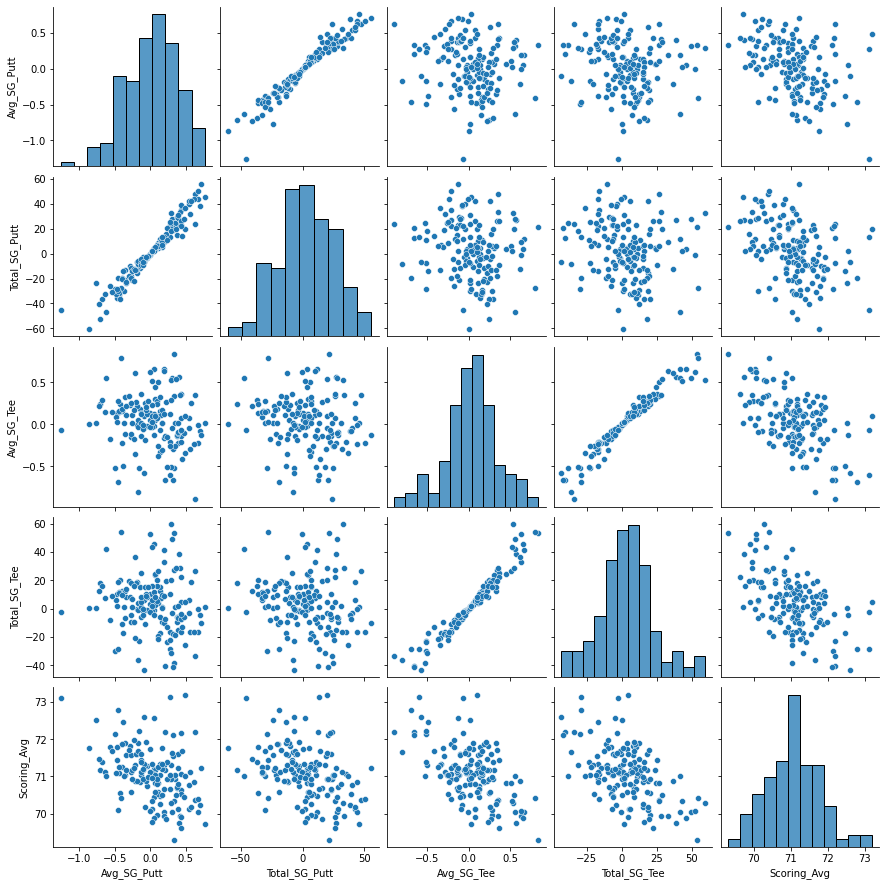

In [29]:
# Create train dataframe by merging X and y train sets
train_df = pd.concat([X_train, y_train], axis = 1)

# Visualize the overview of the dataframe 
# Use pairplot from seaborn
sns.pairplot(train_df)

<AxesSubplot:>

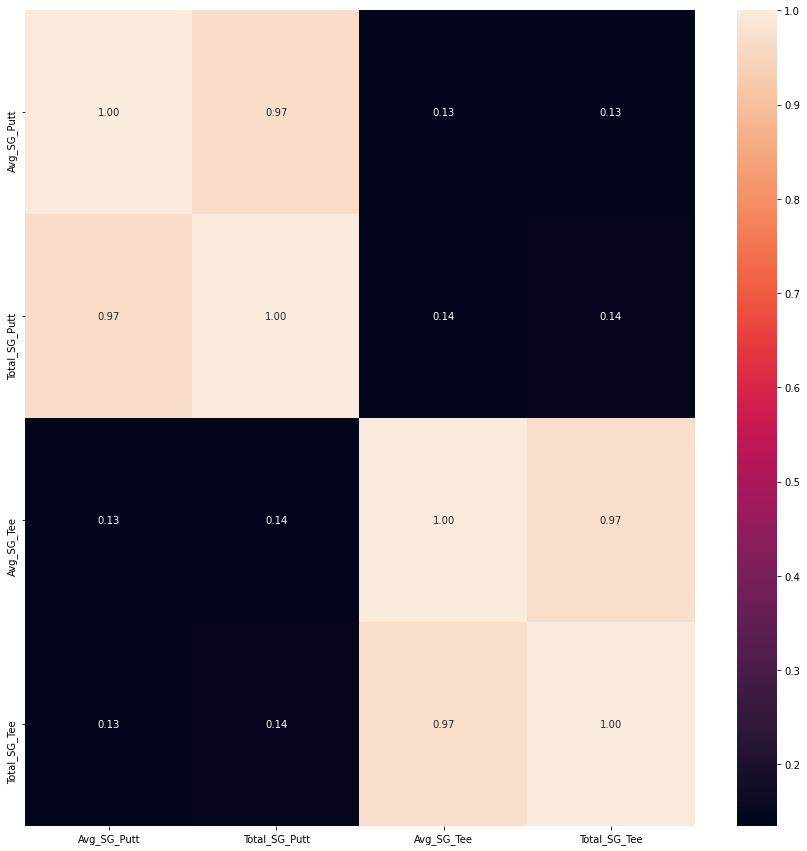

In [30]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

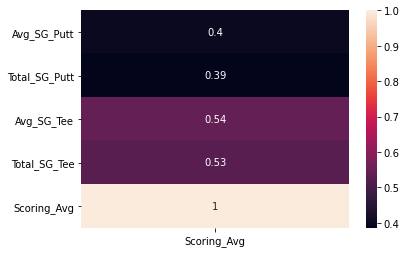

In [31]:
sns.heatmap(train_df.corr()[['Scoring_Avg']].abs(),annot=True)

In [32]:
train_df2 = train_df.copy()

In [33]:
train_df2.describe()

,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Scoring_Avg
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.025910,2.744827,0.035929,3.538532,71.080256
std,0.364957,22.973476,0.311296,19.634311,0.727943
min,-1.261000,-60.672000,-0.891000,-43.107000,69.300000
25%,-0.211750,-12.432750,-0.134000,-7.299000,70.590000
50%,0.052000,3.619000,0.053500,3.120500,71.075000
75%,0.309750,20.172500,0.226750,14.960750,71.500000
max,0.764000,55.768000,0.834000,59.481000,73.200000


In [34]:
train_df2.columns

Index(['Name', 'Avg_SG_Putt', 'Total_SG_Putt', 'Avg_SG_Tee', 'Total_SG_Tee',
       'Scoring_Avg'],
      dtype='object')

In [35]:
train_df2 = train_df2.drop(columns=['Total_SG_Putt', 'Total_SG_Tee'])
train_df2.head()

,Name,Avg_SG_Putt,Avg_SG_Tee,Scoring_Avg
5,Jason Kokrak,0.628,0.352,70.37
65,Rory McIlroy,0.187,0.660,70.04
136,Lucas Glover,-0.141,0.185,70.86
97,Sam Ryder,0.056,-0.019,71.19
168,Jason Dufner,-0.392,0.165,71.25


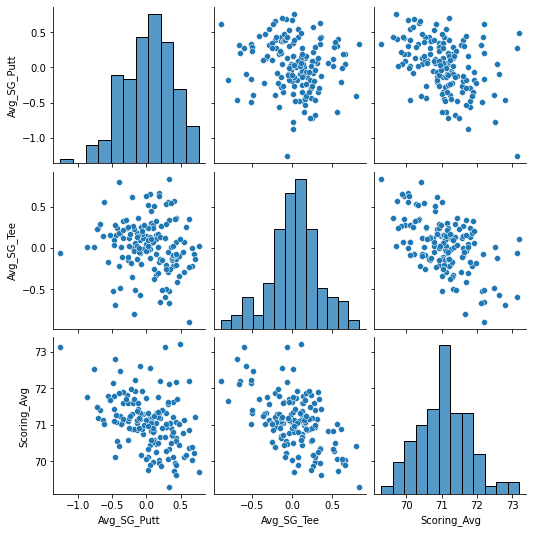

In [36]:
sns.pairplot(train_df2)

In [37]:
X_train = train_df2
y_train = train_df2['Scoring_Avg']

In [38]:
X_train.head()

,Name,Avg_SG_Putt,Avg_SG_Tee,Scoring_Avg
5,Jason Kokrak,0.628,0.352,70.37
65,Rory McIlroy,0.187,0.660,70.04
136,Lucas Glover,-0.141,0.185,70.86
97,Sam Ryder,0.056,-0.019,71.19
168,Jason Dufner,-0.392,0.165,71.25


In [41]:
def fit_n_run(xtr, ytr):
    '''
    This function runs fits and runs the model for the variable input with the X_train, y_train and returns model summary 
    Input:
    xtr: X_training set
    y_tr: y_training set
    
    Output:
    Model Summary
    '''
    model = sm.OLS(ytr, sm.add_constant(xtr)).fit()
    print(model.summary())

## Modeling

### <u>Model 1</u>
 - Average strokes gained putting.

In [57]:
fit_n_run(X_train['Avg_SG_Putt'], y_train)

                            OLS Regression Results                            
Dep. Variable:            Scoring_Avg   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     30.15
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           1.62e-07
Time:                        11:54:18   Log-Likelihood:                -157.37
No. Observations:                 156   AIC:                             318.7
Df Residuals:                     154   BIC:                             324.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          71.1012      0.054   1326.350      

### <u>Model 2</u>
 - Average strokes gained from the tee.

In [45]:
fit_n_run(X_train['Avg_SG_Tee'], y_train)

                            OLS Regression Results                            
Dep. Variable:            Scoring_Avg   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     64.76
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           2.12e-13
Time:                        11:31:16   Log-Likelihood:                -143.94
No. Observations:                 156   AIC:                             291.9
Df Residuals:                     154   BIC:                             298.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.1260      0.049   1440.184      0.0